<a href="https://colab.research.google.com/github/JavierCarrillo12/computacion-visual-javier-carrillo/blob/main/2025-04-29_taller_1/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

# Crear una figura 2D con puntos y formas.

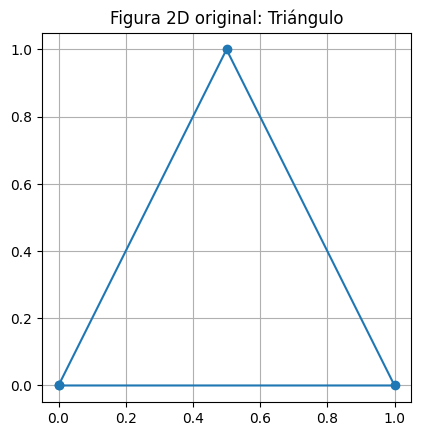

In [2]:
triangulo = np.array([
    [0, 0, 1],      # Punto A (x=0, y=0)
    [1, 0, 1],      # Punto B (x=1, y=0)
    [0.5, 1, 1],    # Punto C (x=0.5, y=1)
    [0, 0, 1]       # Punto A otra vez, para cerrar el triángulo
]).T  # Transponemos para que cada columna sea un punto

plt.plot(triangulo[0], triangulo[1], marker='o')
plt.gca().set_aspect('equal')
plt.title("Figura 2D original: Triángulo")
plt.grid(True)
plt.show()

## Aplicar traslación, rotación y escala usando matrices de transformación

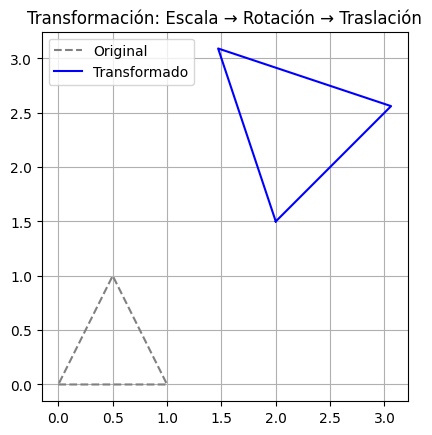

In [3]:
# Matriz de rotación (angulo radianes)
theta = np.pi / 4  # 45 grados en radianes
R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0, 0, 1]
])

# Matriz de escala
scale = 1.5
S = np.array([
    [scale, 0, 0],
    [0, scale, 0],
    [0, 0, 1]
])

# Matriz de traslación
tx, ty = 2, 1.5
T = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])

# transformación compuesta
M = T @ R @ S  # Matriz compuesta
triangulo_transformado = M @ triangulo  # Aplicar a la figura

#Visualizacion
plt.plot(triangulo[0], triangulo[1], '--', label='Original', color='gray')
plt.plot(triangulo_transformado[0], triangulo_transformado[1], label='Transformado', color='blue')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.title("Transformación: Escala → Rotación → Traslación")
plt.show()

## Generar una animación (bucles o interpolación), animar la transformación en función del tiempo o del frame.



In [4]:
# Triángulo base
triangulo = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [0.5, 1, 1],
    [0, 0, 1]
]).T

# Carpeta de frames
os.makedirs("frames_interpolacion", exist_ok=True)

# Número de pasos
n_steps = 10

for i in range(n_steps):
    # Interpolación lineal
    t = i / (n_steps - 1)  # t ∈ [0, 1]

    # Escala interpolada
    scale = 1 + t  # de 1 a 2
    S = np.array([
        [scale, 0, 0],
        [0, scale, 0],
        [0, 0, 1]
    ])

    # Rotación interpolada (0 a 90°)
    theta = t * np.pi / 2
    R = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])

    # Traslación interpolada
    tx = 2 * t
    ty = 1.5 * t
    T = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

    # Transformación compuesta
    M = T @ R @ S
    figura = M @ triangulo

    # Dibujar figura transformada
    plt.figure()
    plt.plot(triangulo[0], triangulo[1], '--', color='gray')
    plt.plot(figura[0], figura[1], color='blue')
    plt.gca().set_aspect('equal')
    plt.title(f"Paso {i+1} de {n_steps}")
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    plt.grid(True)
    plt.savefig(f"frames_interpolacion/frame_{i:03d}.png")
    plt.close()

## Exportar como GIF animado con imageio

In [5]:
# Ruta de los frames
frames_dir = "frames_interpolacion"
frame_paths = sorted([os.path.join(frames_dir, f) for f in os.listdir(frames_dir) if f.endswith(".png")])

# Leer los frames
imagenes = [imageio.v2.imread(frame) for frame in frame_paths]

# Guardar como GIF
imageio.mimsave("animacion_interpolada.gif", imagenes, duration=0.2)